In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure2'

In [3]:
import database
db = database.db

In [4]:
subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')

In [5]:
import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

In [6]:
import preprocess_one_session as prepos

In [7]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_fie

In [8]:
import statannotations

# prep for regression

first try: categorical vars for pos, trial, speed & locomotion, 
off_track_event, off_track_event previous trial same location
pause_event, pause_event previous trial same location
current_trial correct
previous_trial correct

In [9]:
beh_var_l = ['task_index','trial_type','trial','time','lin','lin_binned','speed_gauss','v_gauss','off_track_event','pause_event','directed_locomotion']

beh_df_all = spk_beh_df_all[beh_var_l]

beh_df_all_fam = beh_df_all.query('task_index==0')

def get_categorical_var(df,var_bin_d):
    for k,val in var_bin_d.items():
        k_cat = k+'_cat'
        df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)
    return df

var_bin_d = {'speed_gauss':[0,1,5,10,20],'lin':[0,15,44.5,74,92.5,111,148,185,202,222]}
beh_df_all_fam = get_categorical_var(beh_df_all_fam,var_bin_d)

# not moving part, all asign to category 0
beh_df_all_fam.loc[~beh_df_all_fam['directed_locomotion'].astype(bool),'speed_gauss_cat'] = 0

# only keep the running
beh_df_all_fam = beh_df_all_fam.loc[beh_df_all_fam['directed_locomotion'].astype(bool)]

## independent var

In [16]:
ind_var_per_trial_pos_all=beh_df_all_fam.groupby(level=(0,1)).apply(lambda x:x.groupby(['task_index','trial','lin_binned'])[['lin','trial','speed_gauss']].mean())




In [17]:
# get time bin and time per trial and pos!!!!
n_timebin_per_trial_pos_all = beh_df_all_fam.groupby(level=(0,1)).apply(lambda x:x.groupby(['task_index','trial','lin_binned']).count().iloc[:,0])
dt_per_ani_sess_task =beh_df_all.set_index('task_index',append=True).groupby(level=(0,1,3)).apply(lambda x:np.median(np.diff(x['time'])))
time_per_trial_pos_all = n_timebin_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x * dt_per_ani_sess_task.loc[x.name])

In [18]:
# get n fields per pos!!!
pos_key = 'peak'
n_field_per_ani_sess_task_pos = all_fields_recombined_all.groupby(level=(0,1,2)).apply(lambda x:x[pos_key].astype(int).value_counts(sort=False).sort_index(level=3)) # assuming pos_key column is int


n_field_per_ani_sess_task_pos = pd.DataFrame(n_field_per_ani_sess_task_pos.values,index=n_field_per_ani_sess_task_pos.index,columns=['n_field'])


In [19]:
# categorize vars
var_bin_d = {'speed_gauss':[0,1,5,10,20,np.inf],'lin':[0,15,44.5,74,92.5,111,148,185,202,222],'trial':np.arange(0,60,4)}
ind_var_per_trial_pos_all = get_categorical_var(ind_var_per_trial_pos_all,var_bin_d)

In [20]:
ind_var_per_trial_pos_all

lin  trial  \
                         task_index trial lin_binned                      
e13_16f1 e13_16f1_210302 0          0.0   1             3.873202    0.0   
                                          2             5.415040    0.0   
                                          3             7.643223    0.0   
                                          4            10.135578    0.0   
                                          5            12.247501    0.0   
...                                                          ...    ...   
e16_3m2  e16_3m2_211213  0          26.0  95          211.681222   26.0   
                                          96          214.024837   26.0   
                                          97          216.380268   26.0   
                                          98          218.581673   26.0   
                                          99          220.890973   26.0   

                                                      speed_gauss  \
                         task_index trial lin_binned                
e13_16f1 e13_16f1_210302 0          0.0   1              3.978349   
                                          2              5.236367   
                                          3              6.843263   
                                          4              6.743249   
                                          5              5.019438   
...                                                           ...   
e16_3m2  e16_3m2_211213  0          26.0  95             5.904896   
                                          96             6.144764   
                                          97             8.674608   
                                          98             3.429937   
                                          99             6.439045   

                                                      speed_gauss_cat  \
                         task_index trial lin_binned                    
e13_16f1 e13_16f1_210302 0          0.0   1                         1   
                                          2                         2   
                                          3                         2   
                                          4                         2   
                                          5                         2   
...                                                               ...   
e16_3m2  e16_3m2_211213  0          26.0  95                        2   
                                          96                        2   
                                          97                        2   
                                          98                        1   
                                          99                        2   

                                                      lin_cat  trial_cat  
                         task_index trial lin_binned                      
e13_16f1 e13_16f1_210302 0          0.0   1                 0        0.0  
                                          2                 0        0.0  
                                          3                 0        0.0  
                                          4                 0        0.0  
                                          5                 0        0.0  
...                                                       ...        ...  
e16_3m2  e16_3m2_211213  0          26.0  95                8        6.0  
                                          96                8        6.0  
                                          97                8        6.0  
                                          98                8        6.0  
                                          99                8        6.0  

[123755 rows x 6 columns]

In [21]:
ind=ind_var_per_trial_pos_all.index
ind=ind.set_names(['animal','session','task_index','trial','lin_binned'])
ind_var_per_trial_pos_all.index = ind

ind = n_field_per_ani_sess_task_pos.index
ind = ind.set_names(['animal','session','task_index','lin_binned'])
n_field_per_ani_sess_task_pos.index=ind

In [22]:
# add n fields to design matrix
# ind_var_per_trial_pos_all = ind_var_per_trial_pos_all.groupby(level=(2,3),group_keys=False).apply(lambda x:x.assign(n_field=n_field_per_ani_sess_task_pos))

if 'n_field' in ind_var_per_trial_pos_all.columns:
    ind_var_per_trial_pos_all= ind_var_per_trial_pos_all.drop('n_field',axis=1)
gpb = ind_var_per_trial_pos_all.groupby(level=(3),group_keys=False)
ind_var_per_trial_pos_all_l = {}
for k,val in gpb:
    val_joined=val.reset_index(level=3,drop=True).join(n_field_per_ani_sess_task_pos,how='left')
    ind_var_per_trial_pos_all_l[k]=val_joined
ind_var_per_trial_pos_all_l =  pd.concat(ind_var_per_trial_pos_all_l,axis=0)

ind_var_per_trial_pos_all = ind_var_per_trial_pos_all_l.swaplevel(0,1).swaplevel(1,2).swaplevel(2,3)



In [23]:
# add duration to design matrix
ind_var_per_trial_pos_all.loc[time_per_trial_pos_all.index,'duration'] = time_per_trial_pos_all

## prep dependent var

In [24]:
# ani,sess = 'e13_26m1','e13_26m1_210913'
# all_sw_d_all_one = all_sw_d_all.loc[ani,sess]
get_sw_per_trial_pos_func = lambda x:x.groupby(['switch','trial_index','field_pos']).count().iloc[:,0]
sw_per_trial_pos_all = all_sw_d_all.groupby(level=(0,1,2)).apply(get_sw_per_trial_pos_func)

onoff_str_d={1:'on',-1:'off'}
for onoff in [1,-1]:
    sw_per_trial_pos_all_onoff=sw_per_trial_pos_all.loc[(slice(None),slice(None),slice(None),onoff)]
    onoff_str = onoff_str_d[onoff]
    ind_var_per_trial_pos_all[f'sw_{onoff_str}'] = sw_per_trial_pos_all_onoff
    ind_var_per_trial_pos_all[f'sw_{onoff_str}'] = ind_var_per_trial_pos_all[f'sw_{onoff_str}'].fillna(0)
var_per_trial_pos_all = ind_var_per_trial_pos_all

# uni var tests

In [26]:
# var_per_trial_pos_all=var_per_trial_pos_all.reset_index('trial',drop=True)

In [27]:
for onoff_str in onoff_str_d.values():
    var_per_trial_pos_all[f'sw_{onoff_str}_div_n_field_duration'] = var_per_trial_pos_all[f'sw_{onoff_str}'] / (var_per_trial_pos_all['n_field'] * var_per_trial_pos_all['duration'] + 1e-10)

for onoff_str in onoff_str_d.values():
    var_per_trial_pos_all[f'sw_{onoff_str}_div_n_field'] = var_per_trial_pos_all[f'sw_{onoff_str}'] / (var_per_trial_pos_all['n_field']+1e-10)


In [28]:
# sw_on_tr_pos_mean = var_per_trial_pos_all.groupby(level=(-2,-1))['sw_on_div_n_field_duration'].mean().unstack()
sw_on_tr_pos_mean = var_per_trial_pos_all.groupby(['trial_cat','lin_cat'])['sw_on_div_n_field_duration'].mean().unstack()

## shuffle f-test

In [29]:
# key = 'sw_on_div_n_field_duration'
# gpb = var_per_trial_pos_all.groupby('lin_cat')[key]
# f_data,p_data=scipy.stats.f_oneway(*[x.dropna(axis=0) for x in dict(list(gpb)).values()])


In [30]:
import behavior_and_switching as bas
reload(bas)

<module 'behavior_and_switching' from '/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py'>

In [31]:
data = var_per_trial_pos_all
val_key='sw_on_div_n_field_duration' #'sw_on_div_n_field'#
group_key = 'lin_cat'
shuffle_f_test_res = bas.shuffle_f_test_with_posthoc(data,shuffle_groupby_level='session',group_key=group_key,val_key = val_key,
                                                     div_by=None,
                                                     n_repeats = 200)



In [32]:
reload(bas)
mean_per_group_diff_data = shuffle_f_test_res['mean_per_group_diff_data']
mean_per_group_diff_shuffle = shuffle_f_test_res['mean_per_group_diff_shuffle']
sig, pval, sig_inds, pval_selected = bas.post_hoc_test(mean_per_group_diff_data,mean_per_group_diff_shuffle,alpha=0.05,do_bonf=True)

In [33]:
import statannotations 
from statannotations.Annotator import Annotator

In [34]:
sw_on_div_n_field_sum_trial= data.groupby(level=(0,1,2,4))['sw_on'].sum() / data.groupby(level=(0,1,2,4))['n_field'].mean()

In [35]:
data.groupby(level=(0,1,2,4))['lin_cat'].mean()

animal    session          task_index  lin_binned
e13_16f1  e13_16f1_210302  0           0             0.0
                                       1             0.0
                                       2             0.0
                                       3             0.0
                                       4             0.0
                                                    ... 
e16_3m2   e16_3m2_211213   0           95            8.0
                                       96            8.0
                                       97            8.0
                                       98            8.0
                                       99            8.0
Name: lin_cat, Length: 4698, dtype: float64

In [36]:
sw_on_div_n_field_sum_trial = pd.DataFrame(sw_on_div_n_field_sum_trial,columns=['sw_on_div_n_field_sum_trial'])
sw_on_div_n_field_sum_trial['lin_cat'] = var_per_trial_pos_all.groupby(level=(0,1,2,4))['lin_cat'].mean().astype(int)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:0.000e+00
1 vs. 2: Custom statistical test, P_val:5.000e-03
2 vs. 3: Custom statistical test, P_val:0.000e+00
5 vs. 6: Custom statistical test, P_val:0.000e+00
0 vs. 2: Custom statistical test, P_val:0.000e+00
1 vs. 3: Custom statistical test, P_val:0.000e+00
2 vs. 4: Custom statistical test, P_val:0.000e+00
1 vs. 4: Custom statistical test, P_val:0.000e+00
2 vs. 5: Custom statistical test, P_val:0.000e+00
5 vs. 8: Custom statistical test, P_val:0.000e+00
1 vs. 5: Custom statistical test, P_val:0.000e+00
1 vs. 6: Custom statistical test, P_val:0.000e+00
1 vs. 7: Custom statistical test, P_val:0.000e+00
1 vs. 8: Custom statistical test, P_val:0.000e+00


(<AxesSubplot:xlabel='lin_cat', ylabel='sw_on_div_n_field_sum_trial'>,
  <statannotations.Annotation.Annotation at 0x1554fc5440a0>])

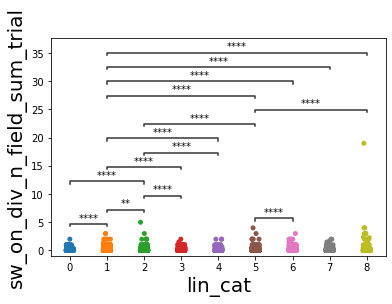

In [37]:
x=group_key
y='sw_on_div_n_field_sum_trial'
data=sw_on_div_n_field_sum_trial
ax=sns.stripplot(data=data,x=x,y=y)
annot = Annotator(ax, sig_inds, data=data, x=x, y=y)

annot.new_plot(ax=ax, pairs=sig_inds,
               data=data, x=x, y=y)
(annot
 .configure(test=None, test_short_name='')
 .set_pvalues(pvalues=pval_selected)
 .annotate())

In [38]:
# data = var_per_trial_pos_all
# shuffle_groupby_level='session'
# group_key='lin_cat'
# # val_key = 'sw_on'
# # div_by=['n_field','duration']
# val_key = 'sw_on_div_n_field_duration'
# div_by=None
# n_repeats = 200
# if div_by is not None:
#     val_key_div = val_key + '_div_' + '_'.join(div_by)
#     div_by_prod = data[div_by].prod(axis=1).values 
#     data[val_key_div] = data[val_key] / div_by_prod
# else:
#     val_key_div=val_key

# gpb = data.groupby(group_key)[val_key_div]
# mean_per_group = gpb.mean()
# mean_per_group_diff = mean_per_group.values[:,None] - mean_per_group.values[None,:]
# f_data,p_data=scipy.stats.f_oneway(*[x.dropna(axis=0) for x in dict(list(gpb)).values()])

# # key = 'sw_on_div_n_field_duration'
# # label = 'lin_cat'

# val_sh_l = []
# for i in range(n_repeats):
#     val_sh= data.groupby(level=shuffle_groupby_level)[val_key].sample(frac=1,replace=False).values
#     if div_by is not None:
#         val_sh = val_sh / div_by_prod
#     val_sh_l.append(val_sh)
    
# val_sh_l_df = pd.DataFrame(np.array(val_sh_l).T)
# val_sh_l_df[group_key] = data[group_key].values
# mean_per_group_sh = val_sh_l_df.groupby(group_key).mean()
# sh_cols = np.arange(n_repeats)

# gpb = val_sh_l_df.groupby(group_key)
# n_groups = len(gpb)
# n_within_group = gpb.count()
# MSB = np.sum(n_within_group*(mean_per_group_sh - val_sh_l_df[sh_cols].mean(axis=0))**2,axis=0) / (n_groups-1)
# MSW = gpb[sh_cols].apply(lambda x:np.sum((x.dropna() - x.dropna().mean(axis=0).values[None,:])**2,axis=0)).sum(axis=0) / (val_sh_l_df[0].dropna().shape[0] - n_groups)
# f_sh = MSB / MSW
# mean_per_group_diff_sh = np.stack(mean_per_group_sh.T.apply(lambda x:x.values[:,None]-x.values[None,:],axis=1).values)


# shuffle_f_test_res = {'f_data':f_data,'p_data':p_data,'f_shuffle':f_sh,
#                       'mean_per_group_data':mean_per_group,'mean_per_group_diff_data':mean_per_group_diff,
#                       'mean_per_group_shuffle':mean_per_group_sh,
#                       'mean_per_group_diff_shuffle':mean_per_group_diff_sh,
#                      }

In [39]:
sns.lineplot(data=data,x='lin_cat',y='sw_on')

ValueError: Could not interpret value `sw_on` for parameter `y`

In [ ]:
sns.lineplot(data=data,x='lin_cat',y='n_field')

In [ ]:
sns.regplot(data=data,x='duration',y='sw_on')

In [ ]:
sns.lineplot(data=val_sh_label_df,x='lin_cat',y=val_key)

In [ ]:
f_sh_l=shuffle_f_test_res['f_shuffle']
f_data=shuffle_f_test_res['f_data']
ph.plot_shuffle_data_dist_with_thresh(f_sh_l,f_data)

In [ ]:
key = 'sw_on_div_n_field_duration'
# data = var_per_trial_pos_all.loc['e16_3m2']
data = var_per_trial_pos_all
groups = [val[key].dropna().values for k,val in data.groupby(['lin_cat'])]


In [ ]:
# scipy.stats.kruskal(*groups)
scipy.stats.f_oneway(*groups)

In [ ]:
# import scikit_posthocs as sp
# # data = copy.copy(var_per_trial_pos_all.loc['e13_26m1'])

# # var_bin_d = {'lin':[0,15,74,111,185,222]}
# # data = get_categorical_var(data,var_bin_d)

# posthoc_results = sp.posthoc_conover(data.dropna(axis=0), val_col=key, group_col='lin_cat', p_adjust='holm')
# # posthoc_results = sp.posthoc_conover(data.dropna(axis=0), val_col=key, group_col='lin_cat', p_adjust=None)


In [ ]:
key = 'sw_on_div_n_field_duration'
ani_l = ['e13_26m1','e15_13f1']
# data = var_per_trial_pos_all.loc[ani_l]
data = var_per_trial_pos_all
sns.lineplot(data=data.reset_index(drop=True),x='lin_cat',y=key)

In [ ]:
key = 'sw_on_div_n_field_duration'
ani_l = ['e13_26m1','e15_13f1']
data = var_per_trial_pos_all.loc[ani_l]
sns.lineplot(data=data.reset_index(drop=True),x='lin_cat',y=key)

In [ ]:
ax=var_per_trial_pos_all.groupby('lin_cat')['sw_on_div_n_field_duration'].mean().plot()

In [ ]:
ax=var_per_trial_pos_all.groupby('lin_cat')['sw_on'].mean().plot()

In [ ]:
var_per_trial_pos_all.groupby('trial')['sw_on_div_n_field_duration'].mean().reset_index().rcorr()

# speed correlation within a segment

In [ ]:
# zscore speed, within session
var_per_trial_pos_all = var_per_trial_pos_all.groupby('session').apply(lambda x:x.assign(speed_z=scipy.stats.zscore(x['speed_gauss'])))
# zscore trial, within session
# var_per_trial_pos_all = var_per_trial_pos_all.groupby('session').apply(lambda x:x.assign(trial_z=scipy.stats.zscore(x['trial'])))
var_per_trial_pos_all = var_per_trial_pos_all.groupby('session').apply(lambda x:x.assign(trial_z=sklearn.preprocessing.quantile_transform(x[['trial']].values)[:,0]))




In [ ]:
# # seperate pos, trial, ani, sess, lots of data points and values very sparse
# var_per_trial_pos_all.groupby('lin_cat').apply(lambda x: x[['speed_z','sw_on_div_n_field_duration']].rcorr())

In [ ]:
# aggregate pos within lin_cat, seperate trial, ani, sess
val_key = 'sw_on_div_n_field'#'sw_on_div_n_field_duration'
val_key_l = ['sw_on_div_n_field_duration','sw_on','sw_on_div_n_field']
var_per_trial_lincat = var_per_trial_pos_all.set_index('lin_cat',append=True).groupby(level=(0,1,2,3,5))[[*val_key_l,'speed_z','trial_z']].mean()
var_per_trial_lincat = var_per_trial_lincat.dropna(axis=0)

var_per_trial_lincat_resetind=var_per_trial_lincat.reset_index(level=(3,4)).rename({'level_3':'trial'},axis=1)

var_per_trial_lincat.groupby('lin_cat').apply(lambda x:x.rcorr())



In [ ]:
# # aggregate pos within lin_cat, seperate trial, ani, sess
# sns.color_palette("Spectral", as_cmap=True)
# toplot = var_per_trial_lincat.loc[(slice(None),slice(None),slice(None),slice(None),8)]
# # toplot['lin_cat']=toplot['lin_cat'].astype('str')
# sns.regplot(data=toplot,x='speed_z',y=val_key,scatter_kws=dict(s=1.))


In [ ]:

import statsmodels
import statsmodels.formula.api as smf

In [ ]:
# formula = f"{val_key} ~ trial + C(lin_cat)"
formula = f"{val_key} ~ trial_z + C(lin_cat)"
# ani_l=['e13_26m1','e15_13f1','e16_3m2','e15_9f1']
# data = var_per_trial_lincat_resetind.loc[ani_l]
# data = data.loc[(data['trial'] >5)&(data['trial'] <20)]
model=smf.ols(formula,data=data)
res = model.fit()
print(res.summary())

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
formula = f"{val_key} ~ trial_z + C(lin_cat) + speed_z"
# ani_l=['e13_26m1','e15_13f1','e16_3m2','e15_9f1']
ani_l=['e15_13f1']
data = var_per_trial_lincat_resetind.loc[ani_l]
# data = var_per_trial_lincat_resetind
data=data.loc[data['trial']>=5]
data = copy.copy(data)
to_zscore_l = [val_key,'speed_z','trial_z']
data[to_zscore_l] = scipy.stats.zscore(data[to_zscore_l],axis=0)


import patsy
from patsy import dmatrix,dmatrices
y,X=dmatrices(formula,data=data)
y = np.squeeze(y)
reg = LassoCV(cv=5, random_state=0,alphas=[0.008,0.009,0.01,0.012,0.015,0.02,0.25,0.3]).fit(X, y)
print(reg.alpha_)


model=smf.ols(formula,data=data)
alpha = reg.alpha_
res = model.fit_regularized(method='elastic_net',alpha=alpha)
res

In [ ]:
res.params

In [ ]:
# try regress out speed, then anova on space
formula = f"{val_key}~speed_z"
model=smf.ols(formula,data=var_per_trial_lincat_resetind)
res=model.fit()
var_per_trial_lincat_resetind['resid_after_speed'] = res.resid.values



In [ ]:
data=data#var_per_trial_lincat_resetind
# resid_f_test_res=bas.shuffle_f_test_with_posthoc(data,shuffle_groupby_level='session',group_key='lin_cat',val_key = 'resid_after_speed',div_by=None,n_repeats = 200)
resid_f_test_res=bas.shuffle_f_test_with_posthoc(data,shuffle_groupby_level='session',group_key='lin_cat',val_key = val_key,div_by=None,n_repeats = 200)




In [ ]:
fig,axs=plt.subplots(2,2,figsize=(10,6))
toplot=data#var_per_trial_lincat_resetind
# sns.regplot(data=toplot,x='trial_z',y='resid_after_speed')
ax=axs[0,0]
sns.scatterplot(data=toplot,x='lin_cat',y=val_key,ax=ax)
# ax.set_ylim([0,1])
ax=axs[0,1]
# ax.set_ylim([0,1])
sns.scatterplot(data=toplot,x='lin_cat',y='resid_after_speed',ax=ax)

ax=axs[1,0]
sns.lineplot(data=toplot.reset_index(),x='lin_cat',y=val_key,ax=ax)
ax=axs[1,1]
sns.lineplot(data=toplot.reset_index(),x='lin_cat',y='resid_after_speed',ax=ax)
plt.tight_layout()

In [ ]:
n_field_per_ani_sess_task_pos

In [ ]:
all_sw_d_all.loc[all_sw_d_all['switch']==1]

In [ ]:
all_sw_d_all

In [ ]:
n_field_per_ani_sess_task_pos

In [ ]:
all_fields_recombined_all

In [ ]:
pos_key = 'peak'
n_field_per_ani_sess_task_pos = all_fields_recombined_all.groupby(level=(0,1,2)).apply(lambda x:x[pos_key].astype(int).value_counts(sort=False).sort_index(level=3)) # assuming pos_key column is int
n_field_per_ani_sess_task_pos = pd.DataFrame(n_field_per_ani_sess_task_pos.values,index=n_field_per_ani_sess_task_pos.index,columns=['n_field'])


In [ ]:
var_bin_d['lin_binned'] = np.array(var_bin_d['lin']) / 2.2
sw_on_count_per_sess = all_sw_d_all.loc[all_sw_d_all['switch']==1].groupby(level=(0,1,2),group_keys=False).apply(lambda x:np.histogram(x['field_pos'],var_bin_d['lin_binned'])[0])
sw_on_count_per_sess=pd.DataFrame(np.stack(sw_on_count_per_sess.values,axis=0),index=sw_on_count_per_sess.index)

loc_key='peak'
n_field_lincat_count_per_sess=all_fields_recombined_all.groupby(level=(0,1,2),group_keys=False).apply(lambda x:np.histogram(x[loc_key],var_bin_d['lin_binned'])[0])
n_field_lincat_count_per_sess=pd.DataFrame(np.stack(n_field_lincat_count_per_sess.values,axis=0),index=n_field_lincat_count_per_sess.index)



In [ ]:
sw_on_n_field_ratio_per_sess=sw_on_count_per_sess / n_field_lincat_count_per_sess

In [ ]:
ani_order=sw_on_count_per_sess.sum(axis=1).groupby(level=0).mean().sort_values(ascending=False).index

In [ ]:
ani_order=sw_on_count_per_sess.sum(axis=1).groupby(level=0).mean().sort_values(ascending=False).index
toplot = sw_on_n_field_ratio_per_sess.groupby(level=(0,2)).mean().loc[(slice(None),0),:]
nplots = toplot.shape[0]
fig,axs=ph.subplots_wrapper(nplots)
for ii,(ani,row) in enumerate(toplot.loc[ani_order].iterrows()):
    ax=axs.ravel()[ii]
    ax.plot(row)
    ax.set_title(ani)


In [ ]:
sw_on_count_per_ani=sw_on_count_per_sess.groupby(level=(0,2)).sum().loc[(slice(None),0),:]
n_field_lincat_count_per_ani = n_field_lincat_count_per_sess.groupby(level=(0,2)).sum().loc[(slice(None),0),:]
ratio_per_ani=sw_on_count_per_ani / n_field_lincat_count_per_ani

toplot = ratio_per_ani
nplots = toplot.shape[0]
fig,axs=ph.subplots_wrapper(nplots)
for ii,(ani,row) in enumerate(toplot.iterrows()):
    ax=axs.ravel()[ii]
    ax.plot(row)
    ax.set_title(ani)


In [ ]:
n_field_lincat_count_per_sess

In [ ]:
sw_on_count_per_sess.stack()

In [ ]:
pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)

In [ ]:
toplot.groupby('lin_cat').mean()

In [ ]:
toplot=var_per_trial_lincat_resetind[[val_key,'resid_after_speed']]
ax=sns.regplot(data=toplot,x=val_key,y='resid_after_speed')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(6,6))
toplot=var_per_trial_lincat_resetind
ax=axs[0]
sns.regplot(data=toplot,x='trial_z',y=val_key,ax=ax)
ax=axs[1]
sns.regplot(data=toplot,x='trial_z',y='sw_on',ax=ax)
ax=axs[2]
sns.regplot(data=toplot,x='trial_z',y='sw_on_div_n_field',ax=ax)
plt.tight_layout()

In [ ]:
var_per_trial_pos_all.groupby('trial_cat')['sw_on_div_n_field'].mean().plot()

In [ ]:
# old way of doing frac switch over trials
nan_mask = changes_df_all.isna()
fig,axs=plt.subplots(3,1,sharex=True)
ax=axs[0]
(changes_df_all==1).where(~nan_mask,changes_df_all).loc[(slice(None),slice(None),slice(None),'both'),0:40].mean(axis=0).plot(ax=ax,marker='o')
ax=axs[1]
(changes_df_all==1).where(~nan_mask,changes_df_all).loc[(slice(None),slice(None),slice(None),0),0:40].mean(axis=0).plot(ax=ax,marker='o')
ax=axs[2]
(changes_df_all==1).where(~nan_mask,changes_df_all).loc[(slice(None),slice(None),slice(None),1),0:40].mean(axis=0).plot(ax=ax,marker='o')
ax = ax.set_xlim([5,40])

In [ ]:
# if filter only early trials
# aggregate pos within lin_cat, seperate trial, ani, sess
val_key = 'sw_on_div_n_field_duration'
ma = var_per_trial_pos_all['trial'] <=19

var_per_trial_lincat = var_per_trial_pos_all.loc[ma].set_index('lin_cat',append=True).groupby(level=(0,1,2,3,5))[[val_key,'speed_z']].mean()
var_per_trial_lincat.groupby('lin_cat').apply(lambda x:x.rcorr())



In [ ]:
# aggregate across trials, seperate ani, sess
val_key = 'sw_on_div_n_field_duration'
var_per_pos = var_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x.groupby('lin_cat')[[val_key,'speed_z']].mean())
var_per_pos.groupby(level='lin_cat').apply(lambda x:x.rcorr())

# try statsmodels a bit

In [ ]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
formula = "sw_on~C(lin_cat)+C(speed_gauss_cat)"
dta=ind_var_per_trial_pos_all
# mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Poisson()).fit()
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.NegativeBinomial()).fit()
print(mod1.summary())

In [ ]:
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.NegativeBinomial()).fit()
print(mod1.summary())

In [ ]:
from statsmodels.gam.api import GLMGam, BSplines

In [ ]:
x_spline = dta[['lin', 'speed_gauss']]

bs = BSplines(x_spline, df=[7, 7], degree=[3, 3])

# penalization weight
alpha = np.array([0., 0.])

gam_bs = GLMGam.from_formula('sw_on ~ lin + speed_gauss', data=dta,
smoother=bs, alpha=alpha,family=sm.families.Poisson())

res_bs = gam_bs.fit()

print(res_bs.summary())

In [ ]:
fig=res_bs.plot_partial(0, cpr=True)
# fig.gca().set_ylim([-15,15])

In [ ]:
# import patsy
# from patsy import dmatrix

# from statsmodels.discrete.count_model import ZeroInflatedPoisson
# endog = dta['sw_on']
# exog = dmatrix("C(lin_cat)+C(speed_gauss_cat)",dta)
# zip_model = ZeroInflatedPoisson(endog,exog)
# zip_res=zip_model.fit()
# print(zip_res.summary())
